### Uppgift 1 - Landstatistik

Ni får ett land tilldelat till er grupp. Börja med att anonymisera kolumnen med idrottarnas namn med
hashfunktionen SHA-256.  

Undersök därefter hur det gått för landet i OS genom tiderna. Visualisera exempelvis:  
- de sporter landet fått flest medaljer i
- antal medaljer per OS
- histogram över åldrar
- Skapa fler plots för att visualisera flera aspekter kring ert land och dess sportprestationer i OS.

In [1]:
import hashlib as hl
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
athlete_events = pd.read_csv("./Data/athlete_events.csv")

In [3]:
# Börja med att anonymisera kolumnen med idrottarnas namn med
# hashfunktionen SHA-256.  

athlete_events["Name"] = athlete_events["Name"].apply(lambda name: hl.sha256(name.encode()).hexdigest())

#### Undersök därefter hur det gått för Italien i OS genom tiderna. Visualisera exempelvis:  

In [4]:
athlete_events.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [5]:
# de sporter landet fått flest medaljer i

medals = athlete_events.query("Medal == 'Gold' or Medal == 'Silver' or Medal == 'Bronze'")
italy_medals = medals.query("Team == 'Italy'")

italy_medals.value_counts("Medal")

Medal
Gold      535
Silver    508
Bronze    484
Name: count, dtype: int64

In [6]:
italy_medals_count = italy_medals.value_counts("Sport")

In [7]:
px.bar(
    italy_medals_count,
    title="Italy medals",
    labels={"value": "Number of medals", 
            "variable": "Medals", 
            "count": "Number of medals"},
    template="simple_white"
    )

### Conclusion

Italy has won the most medals in Fencing, Rowing, Cycling, and Water Polo.

## Number of medals per Olympic Game

In [8]:
medals_per_game = italy_medals.groupby("Year")[["Season"]].value_counts()
medals_per_game.sort_values(ascending=False)

Year  Season
2004  Summer    104
1960  Summer     85
1920  Summer     84
1932  Summer     77
1928  Summer     72
1996  Summer     71
1936  Summer     70
2016  Summer     70
2012  Summer     68
1948  Summer     67
2000  Summer     65
1984  Summer     63
1952  Summer     52
1924  Summer     51
1964  Summer     51
1956  Summer     45
1992  Summer     45
2008  Summer     42
1980  Summer     37
1968  Summer     33
1976  Summer     31
1988  Summer     29
1994  Winter     26
1972  Summer     25
1912  Summer     25
2006  Winter     21
2002  Winter     19
1992  Winter     19
1998  Winter     15
2014  Winter     14
1906  Summer      9
1908  Summer      8
1988  Winter      8
2010  Winter      5
1900  Summer      5
1976  Winter      4
1972  Winter      3
1952  Winter      2
1968  Winter      2
1984  Winter      2
1948  Winter      1
1980  Winter      1
1960  Winter      1
Name: count, dtype: int64

Text(0.5, 1.0, 'Italy medals by year')

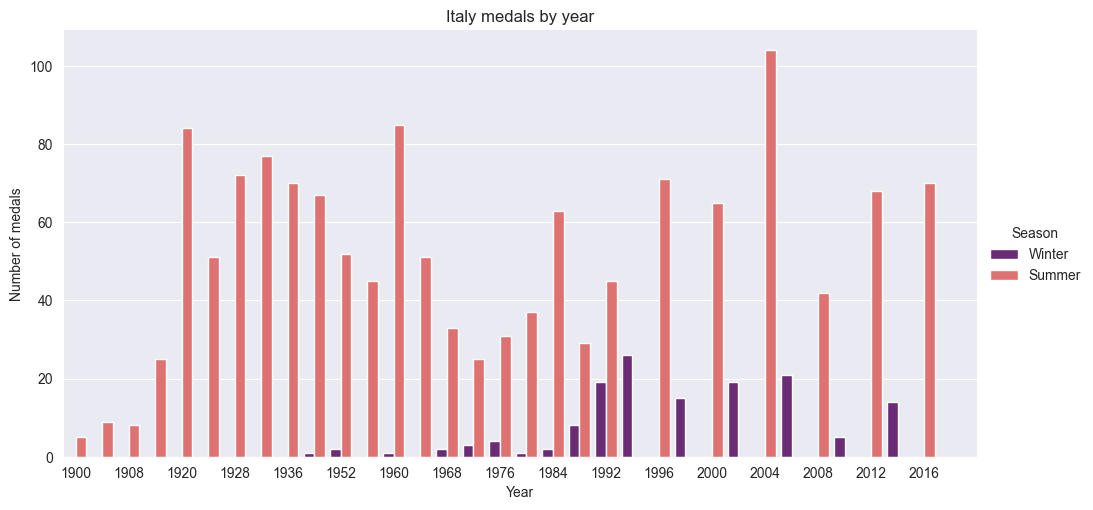

In [9]:
sns.set_style('darkgrid')
sns.catplot(x='Year', kind = 'count', hue = 'Season', data = italy_medals, aspect=2, hue_order=["Winter", "Summer"], palette='magma')
plt.xticks([i for i in range(0, 35, 2)])
plt.ylabel("Number of medals")
plt.title("Italy medals by year")

### Conclusion

The most successful season for Italians was Summer 2004, where they won 104 medals.

In [10]:
age_count = italy_medals["Age"].value_counts()
age_count

Age
25.0    126
23.0    126
21.0    116
26.0     98
24.0     96
22.0     96
29.0     96
27.0     87
28.0     82
20.0     79
31.0     75
30.0     64
33.0     63
32.0     47
34.0     44
19.0     32
35.0     28
37.0     27
36.0     25
38.0     18
18.0     17
39.0     11
17.0      9
43.0      8
40.0      7
16.0      6
14.0      6
46.0      5
41.0      5
42.0      5
15.0      3
45.0      3
44.0      2
49.0      2
12.0      2
47.0      1
11.0      1
59.0      1
57.0      1
13.0      1
Name: count, dtype: int64

In [11]:
italy_medals["Age"].isna().sum()

6

### Histogram showing the total number of medals awarded athletes per group

In [12]:
fig = px.histogram(
    age_count,
    x=age_count.index,
    y=age_count.values,
    nbins=len(age_count.index),
    labels={
        "Age": "Age Group", 
        "sum of y": "Number of Athletes"
    },
    title="Total number of medals awarded athletes per age group",
    template="simple_white",
)

fig.update_traces(hovertemplate=None)
fig.update_layout(hovermode="x")
fig.update_layout(yaxis_title="Number of medals")

### Conclusion

The age groups that win the most medals are 22-23 and 24-25, where both age groups won 222 medals.

In [13]:
athlete_events.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,3a4eef48434c66b3f14ab0221f6762d0ef7c6135ab2790...,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,a6430cc6630934275dc6283f7e97e9625e6587cdddec7a...,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,9c198b205332c2c8e1542e0f9534b9e270780a41d978ec...,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,0a477bb1c5ad39716f9c775e54d18d16aa8b37ada55548...,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,5b7be356aa28178096dc6747f0b8e4e393eaceb5f95310...,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [14]:
italy_athletes = athlete_events.query("Team == 'Italy'")
italy_athletes.sample(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
42668,22017,69e56b15d20dcc98d6858ac5cf76333c4c7060c2fae6b2...,M,27.0,177.0,76.0,Italy,ITA,2008 Summer,2008,Summer,Beijing,Swimming,Swimming Men's 10 kilometres Open Water,NaN
188629,94763,a7a92638c28354fed92d5cced7141382d3f98738a04aba...,M,NaN,NaN,NaN,Italy,ITA,1912 Summer,1912,Summer,Stockholm,Fencing,"Fencing Men's Sabre, Individual",NaN
151508,76039,44308f3ecd5a92138f61139d19ff1843feaa69b47ae960...,M,23.0,NaN,NaN,Italy,ITA,1960 Summer,1960,Summer,Roma,Gymnastics,Gymnastics Men's Individual All-Around,NaN


In [15]:
italy_athletes.isna().sum()

ID           0
Name         0
Sex          0
Age        338
Height    2488
Weight    2798
Team         0
NOC          0
Games        0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal     8733
dtype: int64

In [16]:
all_italy_athletes = italy_athletes["Age"].value_counts()

## Total number of athletes per age group

In [17]:
fig = px.histogram(
    all_italy_athletes,
    x=all_italy_athletes.index,
    y=all_italy_athletes.values,
    nbins=len(all_italy_athletes.index),
    # labels={
    #     "values": "Total number of athletes"
    # },
    title="Total number of athletes per age group",
    template="simple_white"
)

fig.update_traces(hovertemplate=None)
fig.update_layout(hovermode="x")
fig.update_layout(yaxis_title="Number of athletes")

fig.show()

Skapa fler plots för att visualisera flera aspekter kring ert land och dess sportprestationer i OS.

In [18]:
italy_athletes.head(5)
italy_athletes.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10260 entries, 158 to 270894
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      10260 non-null  int64  
 1   Name    10260 non-null  object 
 2   Sex     10260 non-null  object 
 3   Age     9922 non-null   float64
 4   Height  7772 non-null   float64
 5   Weight  7462 non-null   float64
 6   Team    10260 non-null  object 
 7   NOC     10260 non-null  object 
 8   Games   10260 non-null  object 
 9   Year    10260 non-null  int64  
 10  Season  10260 non-null  object 
 11  City    10260 non-null  object 
 12  Sport   10260 non-null  object 
 13  Event   10260 non-null  object 
 14  Medal   1527 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 1.3+ MB


In [19]:
italy_events = athlete_events.query("Team == 'Italy'")

In [20]:
italy_events.isna().sum()
italy_events.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,1c1026605c0607937a724d3d839d964064f6907b3b2e0e...,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
197,91,d5ce4ad5e9aa7549d6069b66cfefa8df14d801fd845cc7...,M,27.0,190.0,80.0,Italy,ITA,2012 Summer,2012,Summer,London,Athletics,Athletics Men's 110 metres Hurdles,NaN
198,92,207f8f997895f35185acbd1e26fab5176d8b3dc6f3300f...,M,21.0,180.0,73.0,Italy,ITA,2008 Summer,2008,Summer,Beijing,Football,Football Men's Football,NaN
214,103,5a52f67df03607d3096242e2779913d915ccb30d26438f...,M,25.0,NaN,NaN,Italy,ITA,1936 Summer,1936,Summer,Berlin,Modern Pentathlon,Modern Pentathlon Men's Individual,Bronze
218,106,e54ebcdcbc9a487cea464c1def380df0dc1ea3d7f4ba83...,M,22.0,188.0,96.0,Italy,ITA,1988 Summer,1988,Summer,Seoul,Rowing,Rowing Men's Quadruple Sculls,Gold


## Average athlete height per sport, ordered alphabetically

In [21]:
sport_heights_mean = italy_events.groupby("Sport").agg({'Height': 'mean'})
sport_heights_mean = sport_heights_mean.dropna()

fig = px.bar(
    sport_heights_mean,
    x=sport_heights_mean.index,
    y="Height",
    title="Average athlete height per sport",
    template="simple_white",
)

fig.update_layout(
    xaxis = dict(
        tickangle=-45       
    ),
    yaxis = dict(
        range = [150, 200]
    )
)

fig.show()

## Average athlete height per sport, ordered by height

In [29]:
sport_heights_mean.sort_values(by="Height", inplace=True)

fig = px.bar(
    sport_heights_mean,
    x=sport_heights_mean.index,
    y="Height",
    title="Average athlete height per sport",
    template="simple_white",
)

fig.update_layout(
    xaxis = dict(
        tickangle=-45       
    ),
    yaxis = dict(
        range = [150, 193]
    )
)

fig.show()

In [23]:
sport_heights_mean

,Height
Sport,
Gymnastics,163.925581
Badminton,164.666667
Trampolining,165.000000
Figure Skating,166.641026
Table Tennis,166.894737
Weightlifting,167.621212
Short Track Speed Skating,168.021898
Diving,168.230769
Rhythmic Gymnastics,168.608696


## 

## BMI index in by sport

In [32]:
# BMI = kg/((height/100)**2)
# Normal BMI: 18.5 to 24.9

italy_events["BMI"] = italy_events["Weight"] / ((italy_events["Height"]/100)**2)

fig = px.scatter(
    italy_events,
    x="Sport",
    y="BMI",
    color="Sex",
    title="BMI index in different sports"
)

fig.update_layout(
    xaxis = dict(
        tickangle=-45
    )
)

fig.show()

C:\Users\Student\AppData\Local\Temp\ipykernel_24064\1063857695.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## BMI index by age

In [25]:
fig = px.scatter(
    italy_events,
    x="Age",
    y="BMI",
    color="Sex",
    hover_data=["Sport", "Year"],
    title="BMI index by age"
)

# The lines show the range of a healthy BMI
fig.add_shape(
    type='line',
    x0=italy_events['Age'].min(),
    x1=italy_events['Age'].max(),
    y0=18.5,
    y1=18.5,
    line=dict(color='red', width=2, dash='dash'),
    name="Min range healthy BMI"
)

fig.add_shape(
    type='line',
    x0=italy_events['Age'].min(),
    x1=italy_events['Age'].max(),
    y0=24.9,
    y1=24.9,
    line=dict(color='red', width=2, dash='dash'),
    name="Max range healthy BMI"
)

fig.show()